In [ ]:
import warnings
from traffic.data import opensky        # Cargamos opensky para poder descargar los datos
from traffic.core import Traffic        # Cargamos la función Traffic de los tipos de aeronaves
from datetime import date, timedelta    # Cargamos el fomrato de tiempo para poder trabajar con él
import pandas as pd                     # Cargamos la libreria pandas para poder trabajar con ella

warnings.filterwarnings("ignore")       # esto nos permite elimnar los avisos

In [ ]:
# Cargamos la BBDD con la que queremos trabajar. Esta BBDD está en formato csv y debe estar en la misma carpeta que este script
# Ahora tenemos que com0probar que el csv es válido y carga los datos con la información y el dtype correspondiente
Bilbao = pd.read_csv("BBDD_Bilbao_prueba.csv")     #Cargamos en DataFrame

# Eliminamos de la BBDD la columna Unnamed
Bilbao = Bilbao.drop("Unnamed: 0", axis = 1)

Bilbao.info()
# Podemos comprobar que ya no tenemos problemas de formato y de que tenemos todo en float64 e int64 y no tenemos la columna de Unnamed

In [7]:
# Ahora sobre esta BBDD ya deberíamos poder aplicar los algoritmos de ML
# Los traiing son todos menos las labels (Conflictos)
X = Bilbao.drop(columns = 'Conflicto', axis = 1)
# Las labels son la columna de conflictos
y = Bilbao['Conflicto']

,altitude_1,geoaltitude_1,latitude_1,longitude_1,Init separation,Init acimut,Var init altitude,Var Vertical speed,Var GS Module,Var Track
0,34000.0,33650.0,42.980331,-3.056292,6.236262,90.772746,-2000.0,0.0,133.304048,-341.906047
1,34000.0,33650.0,42.980331,-3.056292,0.829090,85.550690,2000.0,0.0,39.051215,2.309248
2,34000.0,33650.0,42.980331,-3.056292,1.391655,85.962080,-2000.0,0.0,35.355309,2.519871
3,34000.0,33650.0,42.980331,-3.056292,6.238624,90.362054,0.0,64.0,138.350883,-342.216296
4,34000.0,33650.0,42.980331,-3.056292,6.247074,90.002872,0.0,64.0,134.171416,-342.056357
...,...,...,...,...,...,...,...,...,...,...
5847,42975.0,42675.0,43.050797,-2.819782,5.844058,-134.214223,8975.0,64.0,128.549490,-355.794922
5848,42975.0,42675.0,43.050797,-2.819782,5.706190,-138.123052,-25.0,0.0,62.369811,-5.394816
5849,42975.0,42675.0,43.050797,-2.819782,23.024788,-41.091069,6975.0,64.0,794.290192,-100.453262
5850,42975.0,42675.0,43.050797,-2.819782,4.712034,-155.337857,-25.0,128.0,44.598168,-4.166028


In [26]:
Bilbao.loc[Bilbao['Conflicto'] == 1]

,altitude_1,geoaltitude_1,latitude_1,longitude_1,Init separation,Init acimut,Var init altitude,Var Vertical speed,Var GS Module,Var Track,Conflicto
264,36000.0,35500.0,42.981960,-3.024772,2.883202,80.950929,0.0,0.0,137.185887,-339.881063,1
1037,34000.0,33550.0,42.980301,-2.977614,2.797719,78.887637,-2000.0,0.0,56.293823,-351.827479,1
1074,32000.0,31600.0,43.319744,-3.150003,1.411398,-32.226690,0.0,-64.0,50.159701,-5.449595,1
2426,38000.0,37500.0,42.979773,-2.914647,0.183033,-3.356550,4000.0,0.0,16.031206,-0.032124,1
2560,36050.0,35725.0,43.000443,-3.015747,2.057213,124.176727,850.0,-576.0,63.953053,7.044725,1
2649,37175.0,36625.0,42.980988,-3.020793,6.674943,-88.440498,1175.0,896.0,64.078022,-6.456804,1
2706,34000.0,33425.0,43.018753,-2.932711,4.908144,116.088545,-2025.0,-64.0,37.363051,4.686970,1
2769,36000.0,35600.0,42.981495,-2.976706,2.060899,-56.517180,-50.0,-64.0,61.846531,-7.108972,1
2952,36000.0,35350.0,43.006668,-2.872031,2.424363,-129.183814,-2000.0,64.0,82.975828,-351.388983,1
3008,36025.0,35550.0,42.984238,-2.976337,2.728866,93.846595,-1975.0,64.0,78.243143,-351.936529,1


In [16]:
# Dividimos la muestra entre datos de training y de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , stratify = y, test_size = 0.2, random_state = 42)

# De esta forma tenemos dividia la muestra en un 20% test y 80% train
# Lo he comprobado y he visto que los test X e Y siguen en la misma posición, eso no cambia así que bien, están relacionados los datos con la y

In [38]:
# Vamos a probar con un SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss = 'hinge'))
))

svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [43]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(svm_clf, X, y,
                             cv = 5,
                             scoring = 'neg_mean_absolute_error')

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv = 3)


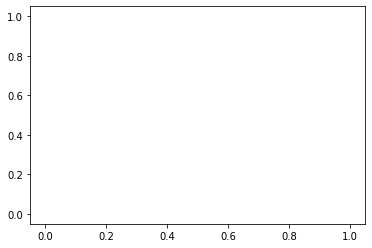

In [55]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

train_errors, test_errors = [], []
for m in range(1, len(X_train)):
    y_train_predict = svm_clf.predict(X_train)
    y_test_predict = svm_clf.predict(X_test)
    train_errors.append(mean_squared_error(y_train_predict, y_train))
    test_errors.append(mean_squared_error(y_test_predict, y_test))

plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label='val')

In [61]:
y_train_predict[y_train_predict == 1]

array([], dtype=int64)

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[4664,    0],
       [  17,    0]], dtype=int64)

In [67]:
corr_matrix = Bilbao.corr()
corr_matrix['Conflicto'].sort_values(ascending = False)

Conflicto             1.000000
Var init altitude     0.008079
altitude_1            0.007357
geoaltitude_1         0.006704
Var Vertical speed   -0.004348
Init acimut          -0.005400
longitude_1          -0.007259
latitude_1           -0.014902
Var Track            -0.019062
Var GS Module        -0.033014
Init separation      -0.038879
Name: Conflicto, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D4E74A75C8>]],
      dtype=object)

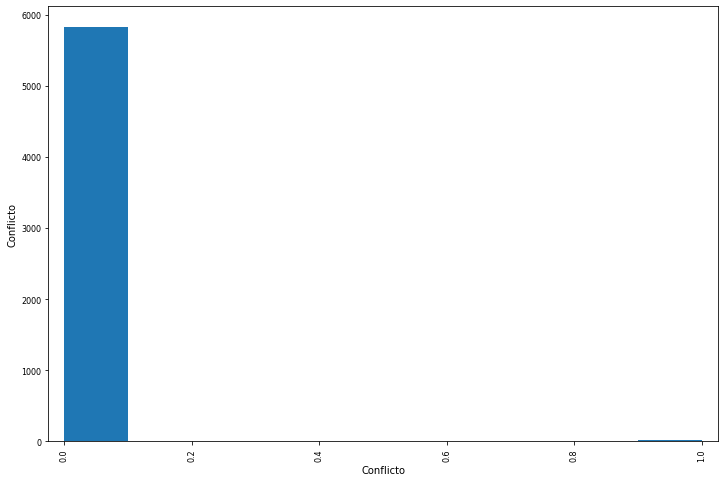

In [69]:
# No hay ningún valor que tenga correlación con los conflictos
from pandas.plotting import scatter_matrix

atributes = ["Conflicto"]
scatter_matrix(Bilbao[atributes], figsize = (12,8))

In [97]:
some_data = X.iloc[260:270]
some_labels = y.iloc[260:270]
some_data_prepared = svm_clf.predict(some_data)
print('Predictions:', some_data_prepared)
print('Labels:', some_labels)

Predictions: [0 0 0 0 0 0 0 0 0 0]
Labels: 260    0
261    0
262    0
263    0
264    1
265    0
266    0
267    0
268    0
269    0
Name: Conflicto, dtype: int64


In [99]:
from sklearn.metrics import mean_squared_error
svm_clf_mse = mean_squared_error(y_train, svm_clf.predict(X_train))
svm_clf_rmse = np.sqrt(svm_clf_mse)
svm_clf_rmse

0.06026360948071121

In [100]:
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

In [101]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

TypeError: _reshape_dispatcher() missing 1 required positional argument: 'newshape'

In [110]:
X_train.iloc[1]

altitude_1            36025.000000
geoaltitude_1         35600.000000
latitude_1               42.982727
longitude_1              -2.832620
Init separation          26.011039
Init acimut             -34.877009
Var init altitude      2175.000000
Var Vertical speed     -896.000000
Var GS Module           738.782821
Var Track               -98.093687
Name: 3584, dtype: float64